In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Linear_X_Train.csv")
Y = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Linear_Y_Train.csv")

In [3]:
X=X.values
Y=Y.values

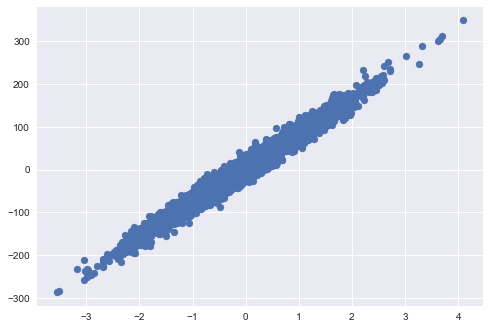

In [4]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()

In [5]:
theta = np.zeros((2,))

In [6]:
# Normalisation

u = X.mean()
sd = X.std()

X = (X-u)/sd

In [7]:
def hypo(X,theta):
    y_ = theta[1]*X+theta[0]
    
    return y_

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    
    m = X.shape[0]
    
    
    y_ = hypo(X,theta)
    grad[0]=np.sum(y_-Y)
    
    grad[1]=np.sum((y_-Y)*X)
    
    
    return grad/m
    
def gradientDescent(X,Y,lr=0.1,maxsteps=100):
    
    theta = np.zeros((2,))
    errorlist=[]
    thetalist=[]
    
    for i in range(maxsteps):
        
        grad= gradient(X,Y,theta)
        
        e= error(X,Y,theta)
        
        theta[0] = theta[0]- lr*(grad[0])
        theta[1] = theta[1]- lr*(grad[1])
        errorlist.append(e)
        thetalist.append((theta[0],theta[1]))

    return theta,errorlist,thetalist
        
def error(X,Y,theta):
    y_ = hypo(X,theta)
    
    pp = np.sum((Y-y_)**2)
    return (pp/X.shape[0])
    

In [8]:
theta , errorlist, theta_list = gradientDescent(X,Y)

In [9]:
y_ = hypo(X,theta)

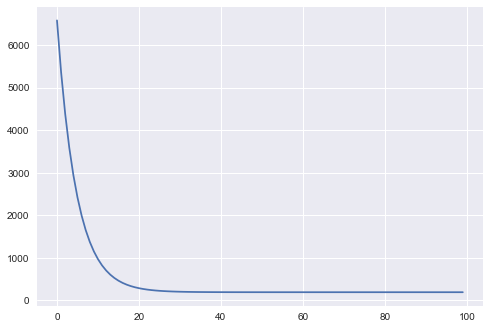

In [10]:
plt.plot(errorlist)

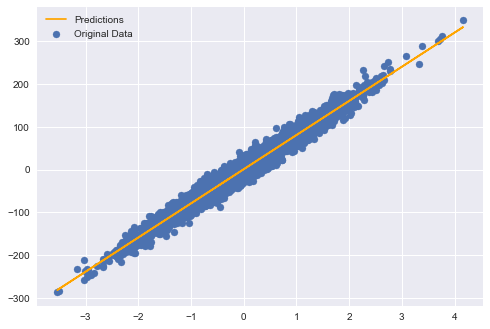

In [11]:
plt.scatter(X,Y,label ="Original Data")
plt.plot(X,y_,color ="orange",label="Predictions")
plt.legend()
plt.show()

In [12]:
X_test = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Linear_X_Test.csv")

Y_test = hypo(X_test,theta)


In [16]:
Y_test.columns=['y']
Y_test

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [17]:
df = pd.DataFrame(data=Y_test,columns=["y"])

In [18]:
df.to_csv("y_predictions2.csv", index=False)